In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from ipywidgets import interact, widgets
from IPython.display import clear_output
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

# 1. Basic Operations


### Q1


In [18]:
data = {
    'Name': ['Virat', 'Dhoni', 'Rohit', 'Sachin', 'Gavaskar'],
    'Math': [90, 80, 85, 70, 95],
    'Science': [85, 88, 90, 75, 92],
    'English': [78, 85, 82, 90, 88]
}

In [19]:
df = pd.DataFrame(data)
df.head()

,Name,Math,Science,English
0,Virat,90,85,78
1,Dhoni,80,88,85
2,Rohit,85,90,82
3,Sachin,70,75,90
4,Gavaskar,95,92,88


In [20]:
df["Total_marks"] = df.English+df.Math+df.Science
df.head()

,Name,Math,Science,English,Total_marks
0,Virat,90,85,78,253
1,Dhoni,80,88,85,253
2,Rohit,85,90,82,257
3,Sachin,70,75,90,235
4,Gavaskar,95,92,88,275


In [21]:
first_5 = df.head(5)
first_5.describe()

,Math,Science,English,Total_marks
count,5.000000,5.000000,5.000000,5.000000
mean,84.000000,86.000000,84.600000,254.600000
std,9.617692,6.670832,4.774935,14.240786
min,70.000000,75.000000,78.000000,235.000000
25%,80.000000,85.000000,82.000000,253.000000
50%,85.000000,88.000000,85.000000,253.000000
75%,90.000000,90.000000,88.000000,257.000000
max,95.000000,92.000000,90.000000,275.000000


### Q2


In [22]:
dummy_data = {
    'Name': ['Aarav', 'Ishita', 'Rohan', 'Sanya', 'Aditya'],
    'Age': [20, 22, 21, 19, 23],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Marks': [85, 92, 78, 88, 90]
}
dummy_df = pd.DataFrame(dummy_data)

dummy_df.to_csv('students.csv', index=False)

In [23]:
loaded_df = pd.read_csv('students.csv')

# Display the last 3 rows of the DataFrame
print("\nLast three rows of the DataFrame:")
print(loaded_df.tail(3))

# Print the total number of rows and columns in the DataFrame
print("\nTotal number of rows:",loaded_df.shape[0])
print("\nTotal number of columns:",loaded_df.shape[1])


Last three rows of the DataFrame:
     Name  Age  Gender  Marks
2   Rohan   21    Male     78
3   Sanya   19  Female     88
4  Aditya   23    Male     90

Total number of rows: 5

Total number of columns: 4


### Q3


In [24]:
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Name': ['dwarf','chuhiya', 'fox', 'snow', 'white']
}
df = pd.DataFrame(data)
df.head()

,Employee,Department,Salary,Name
0,E1,HR,50000,dwarf
1,E2,IT,60000,chuhiya
2,E3,Finance,55000,fox
3,E4,IT,58000,snow
4,E5,HR,52000,white


In [25]:
df["Bonus"] = (df.Salary*0.1).astype(int)
df.head()

,Employee,Department,Salary,Name,Bonus
0,E1,HR,50000,dwarf,5000
1,E2,IT,60000,chuhiya,6000
2,E3,Finance,55000,fox,5500
3,E4,IT,58000,snow,5800
4,E5,HR,52000,white,5200


In [26]:
df.loc[df["Department"] == "IT", "Salary"] *=1.2
df.head()

,Employee,Department,Salary,Name,Bonus
0,E1,HR,50000,dwarf,5000
1,E2,IT,72000,chuhiya,6000
2,E3,Finance,55000,fox,5500
3,E4,IT,69600,snow,5800
4,E5,HR,52000,white,5200


In [27]:
gf = df.drop(columns=["Department"])
gf.head()

,Employee,Salary,Name,Bonus
0,E1,50000,dwarf,5000
1,E2,72000,chuhiya,6000
2,E3,55000,fox,5500
3,E4,69600,snow,5800
4,E5,52000,white,5200


# 2. Indexing and Slicing

### Q1


In [28]:
data = {
    'Employee': ['E1', 'E2', 'E3', 'E4', 'E5'],
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR'],
    'Salary': [50000, 60000, 55000, 58000, 52000],
    'Performance_Rating': [8.2, 7.8, 8.5, 7.4, 8.0],
    'Years_at_Company': [5, 3, 6, 2, 4]
}

In [29]:
df  = pd.DataFrame(data)
df.head()

,Employee,Department,Salary,Performance_Rating,Years_at_Company
0,E1,HR,50000,8.2,5
1,E2,IT,60000,7.8,3
2,E3,Finance,55000,8.5,6
3,E4,IT,58000,7.4,2
4,E5,HR,52000,8.0,4


In [30]:
final_mask = (
    ((df['Department'] == 'HR') | (df['Department'] == 'IT')) & 
    (df['Performance_Rating'] >= 8.0) & 
    ((df['Salary'] < 55000) | (df['Years_at_Company'] >= 4))
)

final_mask

0     True
1    False
2    False
3    False
4     True
dtype: bool

In [31]:
filtered_employees = df[final_mask]
filtered_employees

,Employee,Department,Salary,Performance_Rating,Years_at_Company
0,E1,HR,50000,8.2,5
4,E5,HR,52000,8.0,4


### Q2


In [32]:
data = {
    'Product': ['Laptop', 'Phone', 'Tablet', 'Monitor', 'Headphones'],
    'Price': [800, 400, 300, 150, 50],
    'Stock': [20, 35, 50, 10, 100],
    'Rating': [4.5, 4.2, 3.8, 4.8, 4.0]
}
df = pd.DataFrame(data)
df.head()

,Product,Price,Stock,Rating
0,Laptop,800,20,4.5
1,Phone,400,35,4.2
2,Tablet,300,50,3.8
3,Monitor,150,10,4.8
4,Headphones,50,100,4.0


In [33]:
last_3 = df[-3:]
last_3

,Product,Price,Stock,Rating
2,Tablet,300,50,3.8
3,Monitor,150,10,4.8
4,Headphones,50,100,4.0


In [34]:
last_3_without = last_3.loc[:,["Product", "Price"]]
last_3_without.head()

,Product,Price
2,Tablet,300
3,Monitor,150
4,Headphones,50


### Q3


In [35]:
data = {
    'Name': ['John', 'Sara', 'Tom', 'Alex', 'Julia'],
    'Age': [29, 35, 40, 25, 31],
    'Salary': [50000, 60000, 75000, 45000, 52000],
    'Department': ['HR', 'Finance', 'IT', 'HR', 'IT']
}

df = pd.DataFrame(data)
df.head()

,Name,Age,Salary,Department
0,John,29,50000,HR
1,Sara,35,60000,Finance
2,Tom,40,75000,IT
3,Alex,25,45000,HR
4,Julia,31,52000,IT


In [36]:
lable = df.loc[df["Name"] == "Tom"]
lable.head()

,Name,Age,Salary,Department
2,Tom,40,75000,IT


In [37]:
red_lable = df.iloc[0:2, [2,3]] 
red_lable

,Salary,Department
0,50000,HR
1,60000,Finance


# 3. GroupBy and Aggregations



### Q1


In [38]:
df = pd.DataFrame({
  "StudentID": [1, 2, 3, 2, 3, 1],
  "Subject": ["Math", "Science", "Math",  "Math","Science", "Science"],
  "Score": [85, 90, 78, 88, 92, 95]
})
print(df)

   StudentID  Subject  Score
0          1     Math     85
1          2  Science     90
2          3     Math     78
3          2     Math     88
4          3  Science     92
5          1  Science     95


In [39]:
def calculate_average_score(df):
    student_group = df.groupby("StudentID")
    avg_scores = student_group["Score"].mean()
    return avg_scores


average_scores = calculate_average_score(df)

print(average_scores)

StudentID
1    90.0
2    89.0
3    85.0
Name: Score, dtype: float64


### Q2


In [40]:
data = {
    "Region": ["North", "North", "South", "South", "East", "East", "West", "West"],
    "StoreID": [1, 2, 1, 2, 1, 2, 1, 2],
    "ProductCategory": ["Electronics", "Clothing", "Electronics", "Clothing","Electronics", "Clothing", "Electronics", "Clothing"],
    "Sales": [5000, 3000, 4000, 2000, 4500, 3500, 3000, 2500]
}

# Create a DataFrame and set hierarchical index
df = pd.DataFrame(data)

# Display the dataset
print(df)

df.set_index(['Region', 'StoreID'], inplace=True)

# Display the dataset
print(df)

  Region  StoreID ProductCategory  Sales
0  North        1     Electronics   5000
1  North        2        Clothing   3000
2  South        1     Electronics   4000
3  South        2        Clothing   2000
4   East        1     Electronics   4500
5   East        2        Clothing   3500
6   West        1     Electronics   3000
7   West        2        Clothing   2500
               ProductCategory  Sales
Region StoreID                       
North  1           Electronics   5000
       2              Clothing   3000
South  1           Electronics   4000
       2              Clothing   2000
East   1           Electronics   4500
       2              Clothing   3500
West   1           Electronics   3000
       2              Clothing   2500


In [41]:
total_sales_by_region = df.groupby(level='Region')['Sales'].sum()

# Calculate average sales in each store
average_sales_by_store = df.groupby(level='StoreID')['Sales'].mean()

# Display the results
print("Total Sales by Region:")
print(total_sales_by_region)
print("\nAverage Sales by Store:")
print(average_sales_by_store)

Total Sales by Region:
Region
East     8000
North    8000
South    6000
West     5500
Name: Sales, dtype: int64

Average Sales by Store:
StoreID
1    4125.0
2    2750.0
Name: Sales, dtype: float64


### Q3


In [42]:
import pandas as pd
df_orders = pd.DataFrame({
    'Category': ['Electronics', 'Electronics', 'Clothing', 'Clothing', 'Groceries', 'Groceries'],
    'Order_ID': ['O1', 'O2', 'O3', 'O4', 'O5', 'O6'],
    'Price': [1000, 500, 100, 200, 50, 60],
    'Discount': [50, 25, 10, 20, 5, 6],
    'Quantity': [1, 2, 3, 1, 4, 5]
})

print(df_orders)

      Category Order_ID  Price  Discount  Quantity
0  Electronics       O1   1000        50         1
1  Electronics       O2    500        25         2
2     Clothing       O3    100        10         3
3     Clothing       O4    200        20         1
4    Groceries       O5     50         5         4
5    Groceries       O6     60         6         5


In [43]:
df_orders['Revenue'] = df_orders['Price'] * df_orders['Quantity']
df_orders['Total_Discount'] = df_orders['Discount'] * df_orders['Quantity']

In [44]:
result = df_orders.groupby('Category').agg(
    Total_Revenue=('Revenue', 'sum'),
    Total_Discount=('Total_Discount', 'sum'),
    Avg_Discount_Per_Order=('Total_Discount', 'mean')
).reset_index()

In [45]:
highest_revenue_orders = df_orders.loc[df_orders.groupby('Category')['Revenue'].idxmax(), ['Category', 'Order_ID', 'Revenue']]

In [46]:
final_result = pd.merge(result, highest_revenue_orders, on='Category')
final_result.rename(columns={'Order_ID': 'Highest_Revenue_Order', 'Revenue': 'Highest_Revenue'}, inplace=True)

In [47]:
print(final_result)

      Category  Total_Revenue  Total_Discount  Avg_Discount_Per_Order  \
0     Clothing            500              50                    25.0   
1  Electronics           2000             100                    50.0   
2    Groceries            500              50                    25.0   

  Highest_Revenue_Order  Highest_Revenue  
0                    O3              300  
1                    O1             1000  
2                    O6              300  


# 4. Handling Missing Data


In [48]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Introducing missing values in the 'pclass' column
np.random.seed(42)
pclass_nan_indices = np.random.choice(numeric_df.index, size=int(0.05 * len(numeric_df)), replace=False)
numeric_df.loc[pclass_nan_indices, 'pclass'] = np.nan

# Introducing missing values in the 'parch' column
parch_nan_indices = np.random.choice(numeric_df.index, size=int(0.70 * len(numeric_df)), replace=False)
numeric_df.loc[parch_nan_indices, 'parch'] = np.nan

numeric_df

,survived,pclass,age,sibsp,parch,fare
0,0,3.0,22.0,1,0.0,7.2500
1,1,1.0,38.0,1,NaN,71.2833
2,1,3.0,26.0,0,NaN,7.9250
3,1,1.0,35.0,1,0.0,53.1000
4,0,3.0,35.0,0,0.0,8.0500
...,...,...,...,...,...,...
886,0,NaN,27.0,0,0.0,13.0000
887,1,1.0,19.0,0,NaN,30.0000
888,0,3.0,NaN,1,NaN,23.4500
889,1,1.0,26.0,0,NaN,30.0000


### Q1. Load and Inspect the Data

First 5 rows of the dataset:
   survived  pclass   age  sibsp  parch     fare
0         0     3.0  22.0      1    0.0   7.2500
1         1     1.0  38.0      1    NaN  71.2833
2         1     3.0  26.0      0    NaN   7.9250
3         1     1.0  35.0      1    0.0  53.1000
4         0     3.0  35.0      0    0.0   8.0500


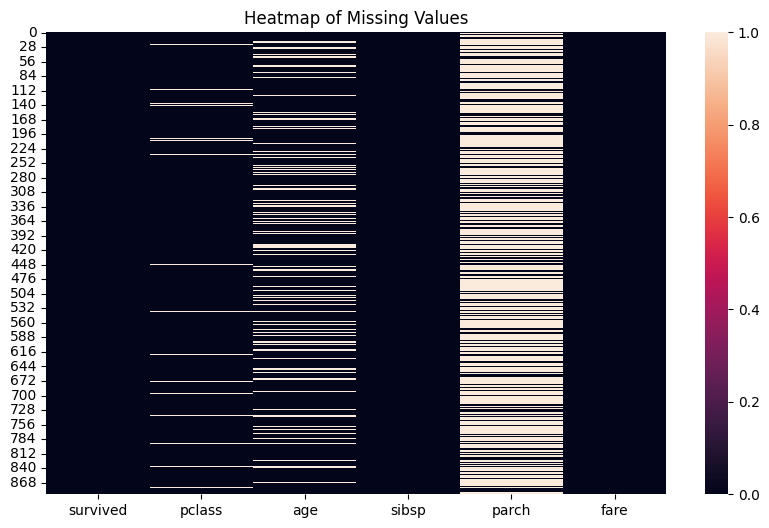


Missing Values Count per Column:
survived      0
pclass       44
age         177
sibsp         0
parch       623
fare          0
dtype: int64


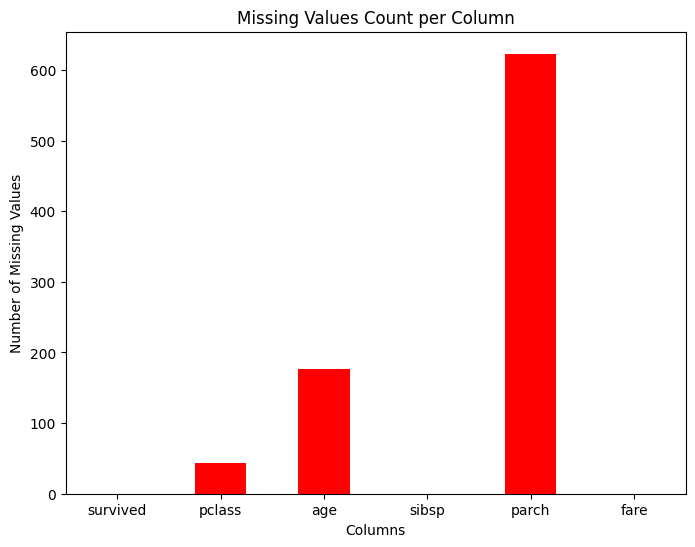

Index(['parch'], dtype='object')

Updated DataFrame after dropping columns with more than 60% missing values:


,survived,pclass,age,sibsp,fare
0,0,3.0,22.0,1,7.2500
1,1,1.0,38.0,1,71.2833
2,1,3.0,26.0,0,7.9250
3,1,1.0,35.0,1,53.1000
4,0,3.0,35.0,0,8.0500


In [49]:
print("First 5 rows of the dataset:")
print(numeric_df.head())

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.isnull())
plt.title("Heatmap of Missing Values")
plt.show()

missing_counts = numeric_df.isnull().sum()
print("\nMissing Values Count per Column:")
print(missing_counts)

# Plot the missing values count
missing_counts.plot(kind='bar', color='r', figsize=(8, 6))
plt.title("Missing Values Count per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation = 0)
plt.show()

# Drop columns with more than 60% missing values
condition = numeric_df.columns[numeric_df.isnull().mean() > 0.60]
print(condition)
numeric_df = numeric_df.drop(columns=condition)

print("\nUpdated DataFrame after dropping columns with more than 60% missing values:")
numeric_df.head()

# Columns with too many missing values are removed since they contribute little information. 
# The threshold of 60% is chosen as a reasonable cutoff to retain usable data.

### Q2

In [50]:
pclass_mode = numeric_df['pclass'].mode()[0]
numeric_df['pclass'].fillna(pclass_mode, inplace=True)

print("\nMissing values in 'pclass' column after mode imputation:")
print(numeric_df['pclass'].isnull())
print(numeric_df['pclass'].isnull().sum())


#Why Mode Imputation is Appropriate for pclass?
# Categorical Nature: pclass represents passenger class (1, 2, or 3), which is a categorical variable.
# Mode Meaning: The mode is the most frequently occurring value in the column and best represents the common passenger class.
# Preserves Distribution: Using the mode ensures the overall distribution of the classes is minimally disturbed.


Missing values in 'pclass' column after mode imputation:
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: pclass, Length: 891, dtype: bool
0


In [51]:
# Check the distribution of 'age' to decide mean or median
# import matplotlib.pyplot as plt
# from scipy.stats import skew

# sns.histplot(numeric_df['age'].dropna(), kde=True)
# plt.show()

# skewness = skew(numeric_df['age'].dropna())
# print("Skewness of age:", skewness)


# If the data is symmetric, use mean imputation
#If the age distribution is symmetrical (Skewness ~ 0):
mean_value = numeric_df['age'].mean()
numeric_df['age'].fillna(mean_value, inplace=True)

print(f"Filled missing 'age' values with mean: {mean_value}")


# If the data is skewed, use median imputation
#If the age distribution is skewed (Skewness > 0 or Skewness < 0):
# median_value = numeric_df['age'].median()
# numeric_df['age'].fillna(median_value, inplace=True)

#Mean works well when the data is normally distributed (symmetrical) because it represents the central tendency accurately.
#Median is better for skewed data because it is robust to outliers, which can distort the mean


Filled missing 'age' values with mean: 29.69911764705882


### Question 3

In [52]:

# Count missing values after imputation
missing_values_after = numeric_df.isnull().sum()
print("Missing Values After Imputation:")
print(missing_values_after)



Missing Values After Imputation:
survived    0
pclass      0
age         0
sibsp       0
fare        0
dtype: int64


In [53]:
# Calculate the mean before imputation
mean_before = numeric_df.mean()

# Impute missing values (if any remaining)
numeric_df.fillna(numeric_df.median(), inplace=True)

# Calculate the mean after imputation
mean_after = numeric_df.mean()

# Compare means
print("Mean Before Imputation:")
print(mean_before)
print("\nMean After Imputation:")
print(mean_after)

Mean Before Imputation:
survived     0.383838
pclass       2.340067
age         29.699118
sibsp        0.523008
fare        32.204208
dtype: float64

Mean After Imputation:
survived     0.383838
pclass       2.340067
age         29.699118
sibsp        0.523008
fare        32.204208
dtype: float64


# 5. Pandas: Merging Joining and Concatenation

### Q1

In [54]:
data1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
data2 = {
    'student_id': [2, 3, 4, 5],
    'grade': ['A', 'B', 'C', 'D']
}

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [55]:
merged_df = pd.merge(df1, df2, on='student_id', how="outer") # types inner, left, right, cross(no on), outer

# Display the result
print(merged_df)

   student_id     name grade
0           1    Alice   NaN
1           2      Bob     A
2           3  Charlie     B
3           4    David     C
4           5      NaN     D


### Q2


In [56]:
employees_data = {
    'employee_id': [1, 2, 3, 4],
    'employee_name': ['Alice', 'Bob', 'Charlie', 'David']
}
departments_data = {
    'employee_id': [2, 3, 4, 1],
    'department_name': ['A', 'B', 'C', 'D']
}

employees = pd.DataFrame(employees_data)
departments = pd.DataFrame(departments_data)

In [57]:
joined_df = pd.merge(employees, departments, on='employee_id', how='left') # even if there is no matching department record

# Display the result
print(joined_df)

   employee_id employee_name department_name
0            1         Alice               D
1            2           Bob               A
2            3       Charlie               B
3            4         David               C


### Q3


In [58]:
df1 = {
    'student_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
}
df2 = {
    'student_id': [5, 6, 7, 8],
    'name': ['Anish', 'Divakar', 'Vaibhav', 'Tanvi']
}

df_a = pd.DataFrame(df1)
df_b = pd.DataFrame(df2)

# Concatenate the DataFrames and reset the index
combined_df = pd.concat([df_a, df_b], ignore_index=True)

# ignores the original indices of the input DataFrames when forming the combined DataFrame and assigns a completely new, 
# sequential index starting from 0.

# Display the result
print(combined_df)

   student_id     name
0           1    Alice
1           2      Bob
2           3  Charlie
3           4    David
4           5    Anish
5           6  Divakar
6           7  Vaibhav
7           8    Tanvi


# 6. Pandas: Advanced Operations (Evaluation and Query)

In [59]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Q1

In [60]:
# Q1 Pandas advanced operations such as evaluation (eval) and conditional querying (query) to analyze and extract insights from the dataset.

# Display dataset information
print("\nDataset Information:")
iris.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Q2

In [61]:
# Display the first 5 rows
print("First 5 rows of the Iris dataset:")
print(iris.head())

# Print summary statistics
print("\nSummary statistics of the Iris dataset:")
print(iris.describe())

First 5 rows of the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary statistics of the Iris dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Q3

In [62]:

filtered_flowers_1 = iris.query("sepal_length > 6.5 and petal_length > 5")
filtered_flowers_1

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
112,6.8,3.0,5.5,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
120,6.9,3.2,5.7,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica


In [63]:
filtered_flowers_2 = iris.query("species == 'virginica' and petal_width < 2")
filtered_flowers_2

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
103,6.3,2.9,5.6,1.8,virginica
106,4.9,2.5,4.5,1.7,virginica
107,7.3,2.9,6.3,1.8,virginica
108,6.7,2.5,5.8,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
116,6.5,3.0,5.5,1.8,virginica
119,6.0,2.2,5.0,1.5,virginica
123,6.3,2.7,4.9,1.8,virginica
125,7.2,3.2,6.0,1.8,virginica


### Q4

In [64]:
iris = iris.eval("petal_area = petal_length * petal_width")
iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96
146,6.3,2.5,5.0,1.9,virginica,9.50
147,6.5,3.0,5.2,2.0,virginica,10.40
148,6.2,3.4,5.4,2.3,virginica,12.42


In [65]:
# Display the top 5 flowers with the largest petal_area
top_petal_area = iris.nlargest(5, 'petal_area') # nlargetst(quantity, what? condition)
print(top_petal_area)


     sepal_length  sepal_width  petal_length  petal_width    species  \
118           7.7          2.6           6.9          2.3  virginica   
109           7.2          3.6           6.1          2.5  virginica   
100           6.3          3.3           6.0          2.5  virginica   
117           7.7          3.8           6.7          2.2  virginica   
144           6.7          3.3           5.7          2.5  virginica   

     petal_area  
118       15.87  
109       15.25  
100       15.00  
117       14.74  
144       14.25  


In [66]:
filtered_flowers = iris.query("petal_area > 10 and 5 <= sepal_length <= 7")
filtered_flowers

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
100,6.3,3.3,6.0,2.5,virginica,15.00
103,6.3,2.9,5.6,1.8,virginica,10.08
104,6.5,3.0,5.8,2.2,virginica,12.76
108,6.7,2.5,5.8,1.8,virginica,10.44
110,6.5,3.2,5.1,2.0,virginica,10.20
111,6.4,2.7,5.3,1.9,virginica,10.07
112,6.8,3.0,5.5,2.1,virginica,11.55
114,5.8,2.8,5.1,2.4,virginica,12.24
115,6.4,3.2,5.3,2.3,virginica,12.19
120,6.9,3.2,5.7,2.3,virginica,13.11


### Q5

Average petal length for each species:
species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

Count of flowers for each species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


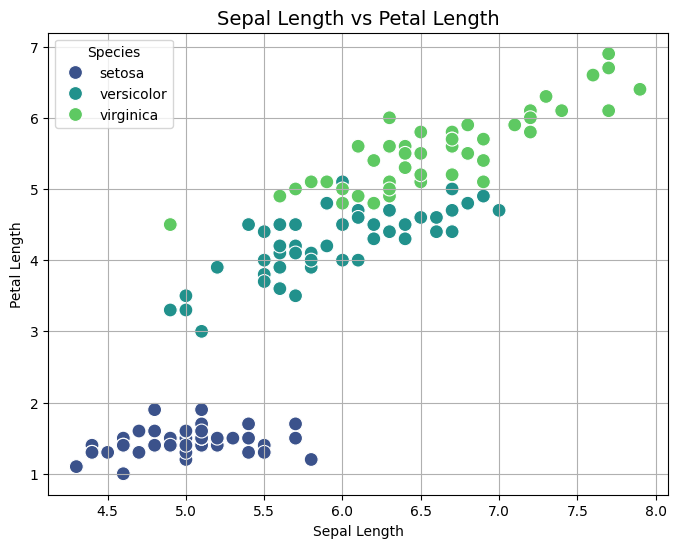

In [67]:
# Calculate the average petal length for each species
avg_petal_length = iris.groupby('species')['petal_length'].mean()
print("Average petal length for each species:")
print(avg_petal_length)



flower_count = iris['species'].value_counts()
print("\nCount of flowers for each species:")
print(flower_count)

# Create a scatter plot of sepal_length vs. petal_length, colored by species
plt.figure(figsize=(8, 6))
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species', palette='viridis', s=100)
plt.title('Sepal Length vs Petal Length', fontsize=14)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Species', loc='upper left')
plt.grid(True)
plt.show()

# 7. Matplotlib: Basic Plotting Questions

### Q1

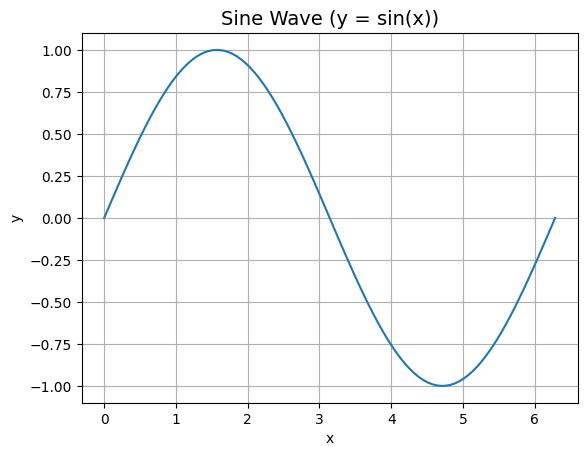

In [68]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.plot(x, y)

# Customize the plot
plt.title('Sine Wave (y = sin(x))', fontsize=14)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Show the plot
plt.show()

### Q2


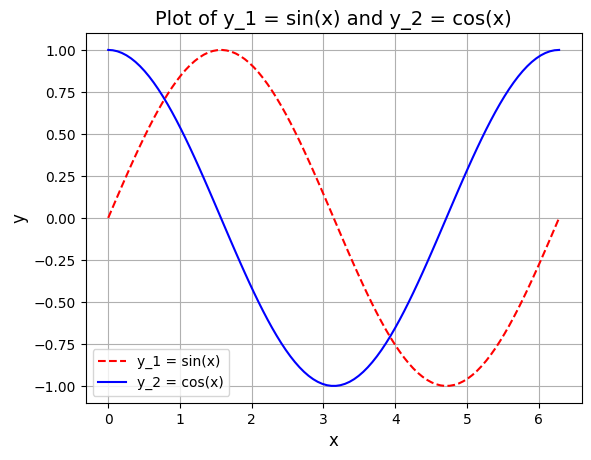

In [69]:
x = np.linspace(0, 2 * np.pi, 100)

y1 = np.sin(x)
y2 = np.cos(x)

# Plot y1 = sin(x) with a red dashed line
plt.plot(x, y1, color='r', linestyle='--', label="y_1 = sin(x)")

# Plot y2 = cos(x) with a blue solid line
plt.plot(x, y2, color='b', linestyle='-', label="y_2 = cos(x)")

plt.title('Plot of y_1 = sin(x) and y_2 = cos(x)', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)


plt.legend()

# Show the plot
plt.show()


### Q3

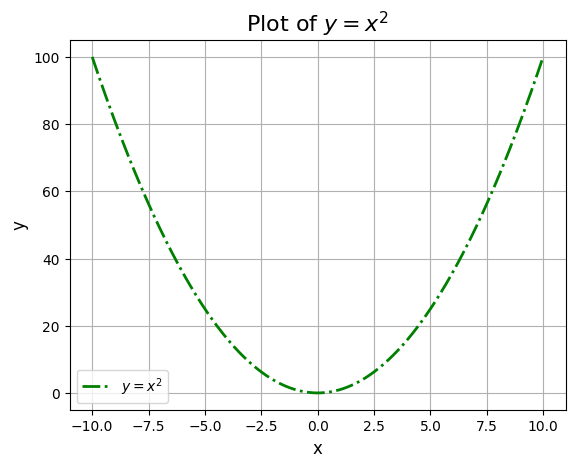

In [70]:
x = np.linspace(-10, 10, 500) # The 500 specifies the number of points (or divisions) that will be evenly spaced between -10 and 10. to Smooth the graph

y = x**2

plt.plot(x, y, color='g', linestyle='-.', linewidth=2, label=r'$y = x^2$')

plt.title('Plot of $y = x^2$', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True)

plt.legend()

plt.show()

# 8a. Bar Plot

In [71]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64


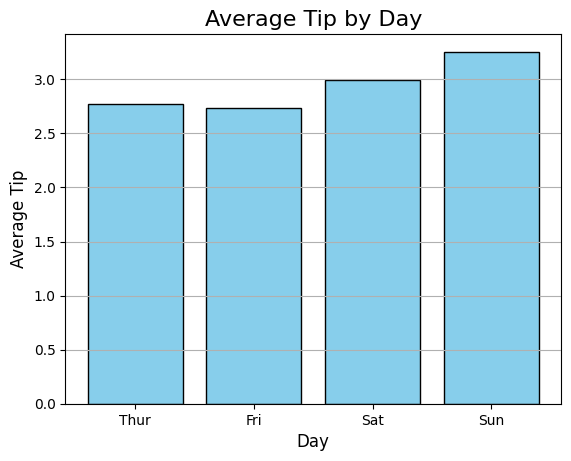

In [72]:
average_tips = tips.groupby("day")["tip"].mean()
print(average_tips)

plt.bar(average_tips.index, average_tips.values, color="skyblue", edgecolor='black')
plt.title("Average Tip by Day", fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Tip', fontsize=12)
plt.grid(axis="y")
plt.show()

# Based on the bar-plot Sunday has the highest average tip

# 8b. Scatter Plot

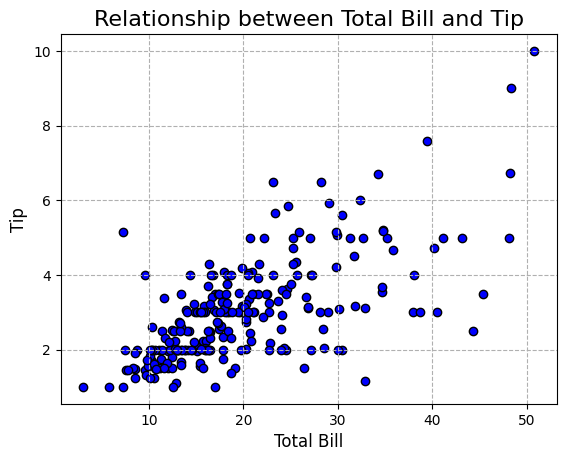

In [73]:
plt.scatter(tips["total_bill"], tips["tip"], color='blue', edgecolor='black')
plt.title('Relationship between Total Bill and Tip', fontsize=16)
plt.xlabel('Total Bill', fontsize=12)
plt.ylabel('Tip', fontsize=12)
plt.grid(True, linestyle='--')

plt.show()


There appears to be a positive relationship between total_bill and tip. As the total bill increases, the tip generally tends to increase as well. However, the relationship does not appear to be perfectly linear, and there is some variability in the amount of tip given for a given total bill

# 9. Matplotlib: Subplots and Layouts

### Q1

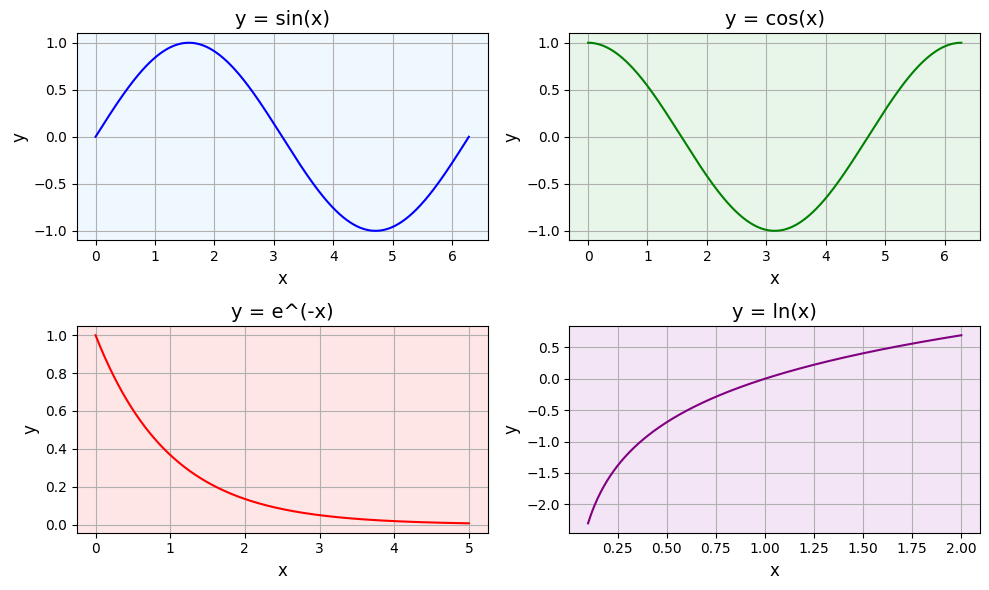

In [74]:
x1 = np.linspace(0, 2 * np.pi, 500)  # For sin(x) and cos(x)
x2 = np.linspace(0, 5, 500)          # For e^(-x)
x3 = np.linspace(0.1, 2, 500)        # For ln(x)

fig, axs = plt.subplots(2, 2, figsize=(10, 6)) 

# Subplot (1, 1): y = sin(x)
axs[0, 0].plot(x1, np.sin(x1), color='blue')
axs[0, 0].set_title('y = sin(x)', fontsize=14)
axs[0, 0].set_xlabel('x', fontsize=12)
axs[0, 0].set_ylabel('y', fontsize=12)
axs[0, 0].set_facecolor('#f0f8ff')  
axs[0, 0].grid(True)

# Subplot (1, 2): y = cos(x)
axs[0, 1].plot(x1, np.cos(x1), color='green')
axs[0, 1].set_title('y = cos(x)', fontsize=14)
axs[0, 1].set_xlabel('x', fontsize=12)
axs[0, 1].set_ylabel('y', fontsize=12)
axs[0, 1].set_facecolor('#e8f5e9') 
axs[0, 1].grid(True)

# Subplot (2, 1): y = e^(-x)
axs[1, 0].plot(x2, np.exp(-x2), color='red')
axs[1, 0].set_title('y = e^(-x)', fontsize=14)
axs[1, 0].set_xlabel('x', fontsize=12)
axs[1, 0].set_ylabel('y', fontsize=12)
axs[1, 0].set_facecolor('#ffe6e6')  
axs[1, 0].grid(True)

# Subplot (2, 2): y = ln(x)
axs[1, 1].plot(x3, np.log(x3), color='purple')
axs[1, 1].set_title('y = ln(x)', fontsize=14)
axs[1, 1].set_xlabel('x', fontsize=12)
axs[1, 1].set_ylabel('y', fontsize=12)
axs[1, 1].set_facecolor('#f3e5f5') 
axs[1, 1].grid(True)

plt.tight_layout()

plt.show()

### Q2

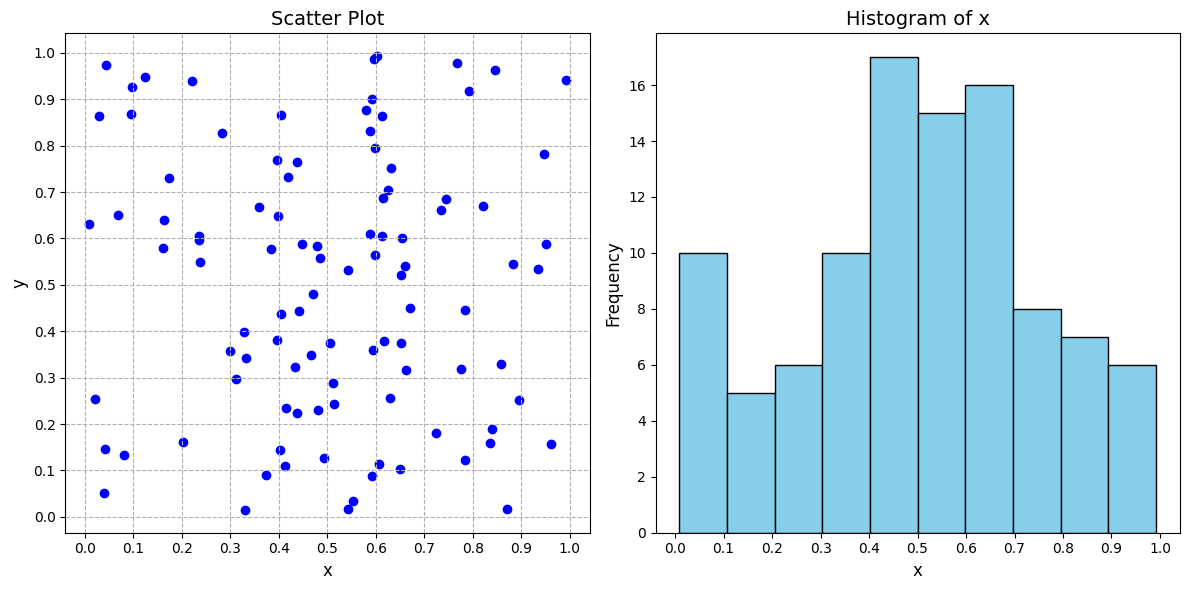

In [75]:
x = np.random.rand(100) 
y = np.random.rand(100)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot
axes[0].scatter(x, y, color='blue',)
axes[0].set_title('Scatter Plot', fontsize=14)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))
axes[0].set_yticks(np.arange(0, 1.1, 0.1)) 
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y', fontsize=12)
axes[0].grid(True, linestyle='--',)

# Histogram of x
axes[1].hist(x, bins=10, color='skyblue', edgecolor='black')
axes[1].set_xticks(np.arange(0, 1.1, 0.1)) 
axes[1].set_title('Histogram of x', fontsize=14)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

plt.show()

### Q3

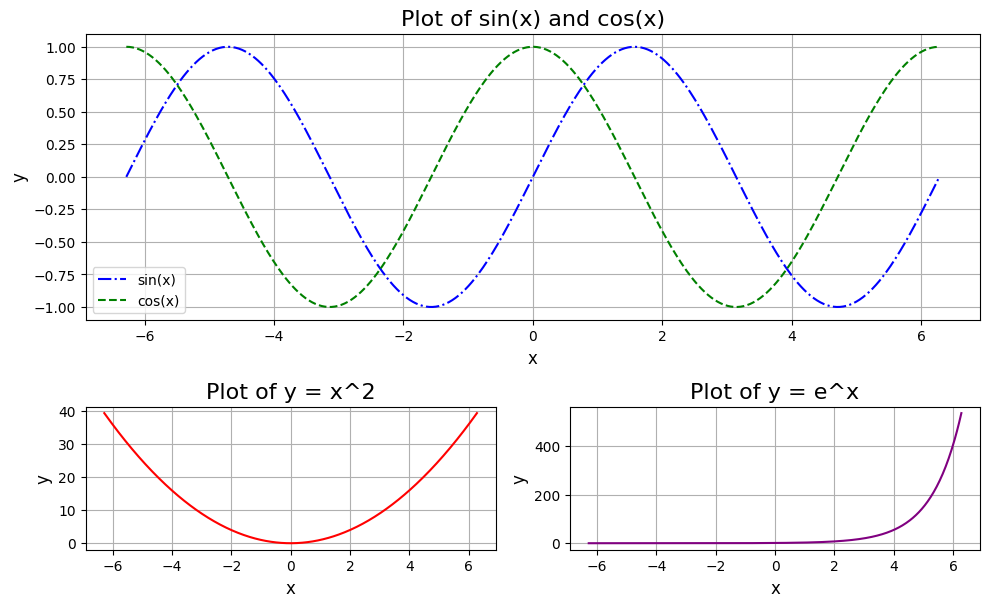

In [76]:
# Create a figure
fig = plt.figure(figsize=(10, 8))

# Define the grid layout
# Top subplot occupies two-thirds, bottom two subplots take one-third each
gs = fig.add_gridspec(3, 2, height_ratios=[2, 1, 1])  # 3 rows, 2 columns

# Large subplot in the top row, spanning both columns
ax1 = fig.add_subplot(gs[0, :])  # Span across both columns
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot sin(x) and cos(x) on the same graph
ax1.plot(x, y_sin, label='sin(x)', color='blue', linestyle='-.')
ax1.plot(x, y_cos, label='cos(x)', color='green', linestyle='--')

ax1.set_title('Plot of sin(x) and cos(x)', fontsize=16)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.legend()
ax1.grid(True)

# Smaller subplot on the left (y = x^2)
ax2 = fig.add_subplot(gs[1, 0])
y = x**2
ax2.plot(x, y, color='red', linestyle='-')
ax2.set_title('Plot of y = x^2', fontsize=16)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
ax2.grid(True)

# Smaller subplot on the right (y = e^x)
ax3 = fig.add_subplot(gs[1, 1])
y_exp = np.exp(x)
ax3.plot(x, y_exp, color='purple', linestyle='-')
ax3.set_title('Plot of y = e^x', fontsize=16)
ax3.set_xlabel('x', fontsize=12)
ax3.set_ylabel('y', fontsize=12)
ax3.grid(True)

plt.tight_layout()

# Show the plot
plt.show()

# 10. Matplotlib: Advanced Customization

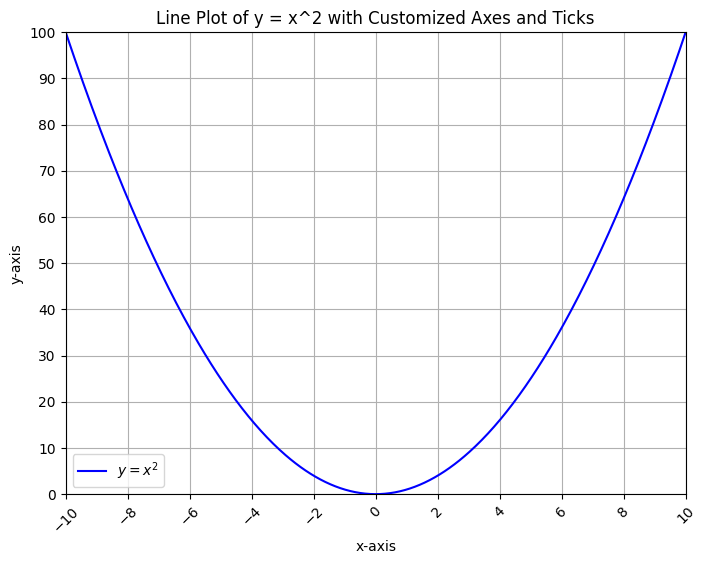

In [77]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 500)
y = x**2

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, label=r'$y = x^2$', color='blue')

# Customize axes ranges
ax.set_xlim(-10, 10)
ax.set_ylim(0, 100)

# Set custom tick marks
ax.set_xticks(np.arange(-10, 11, 2))
ax.set_yticks(np.arange(0, 101, 10))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

# Add labels, title, and legend
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('Line Plot of y = x^2 with Customized Axes and Ticks')
ax.legend()

# Display grid and show the plot
ax.grid(True)
plt.show()


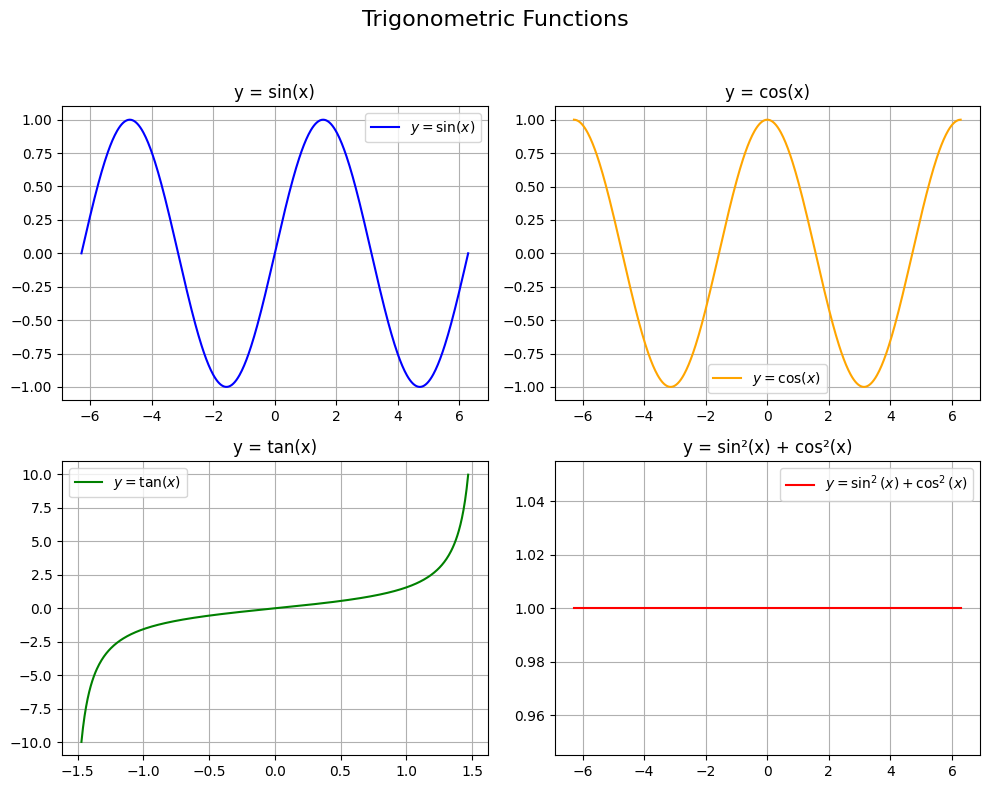

In [78]:
#Question 2 
# Generate x values
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
x_tan = np.linspace(-np.pi / 2 + 0.1, np.pi / 2 - 0.1, 500)  # Avoid undefined regions for tan

# Generate y values
y_sin = np.sin(x)
y_cos = np.cos(x)
y_tan = np.tan(x_tan)
y_identity = np.sin(x)**2 + np.cos(x)**2

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Trigonometric Functions', fontsize=16)

# Top-left: y = sin(x)
axes[0, 0].plot(x, y_sin, label=r'$y = \sin(x)$', color='blue')
axes[0, 0].set_title('y = sin(x)')
axes[0, 0].grid(True)
axes[0, 0].legend()

# Top-right: y = cos(x)
axes[0, 1].plot(x, y_cos, label=r'$y = \cos(x)$', color='orange')
axes[0, 1].set_title('y = cos(x)')
axes[0, 1].grid(True)
axes[0, 1].legend()

# Bottom-left: y = tan(x)
axes[1, 0].plot(x_tan, y_tan, label=r'$y = \tan(x)$', color='green')
axes[1, 0].set_title('y = tan(x)')
axes[1, 0].grid(True)
axes[1, 0].legend()

# Bottom-right: y = sin^2(x) + cos^2(x)
axes[1, 1].plot(x, y_identity, label=r'$y = \sin^2(x) + \cos^2(x)$', color='red')
axes[1, 1].set_title('y = sin²(x) + cos²(x)')
axes[1, 1].grid(True)
axes[1, 1].legend()

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


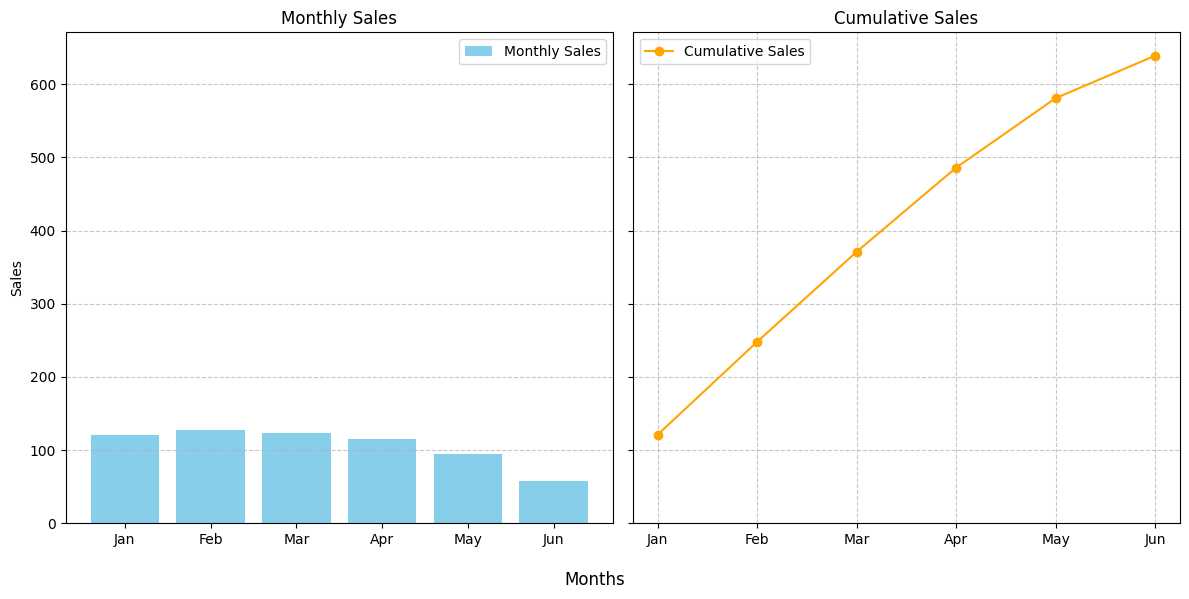

In [79]:
#Question 3

import numpy as np
import matplotlib.pyplot as plt

# Generate random sales data for January to June
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales = np.random.randint(50, 150, size=6)
cumulative_sales = np.cumsum(sales)

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Bar chart for sales
axes[0].bar(months, sales, color='skyblue', label='Monthly Sales')
axes[0].set_title('Monthly Sales')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Line chart for cumulative sales
axes[1].plot(months, cumulative_sales, marker='o', color='orange', label='Cumulative Sales')
axes[1].set_title('Cumulative Sales')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend()

# Add a common x-axis label
fig.supxlabel('Months', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()


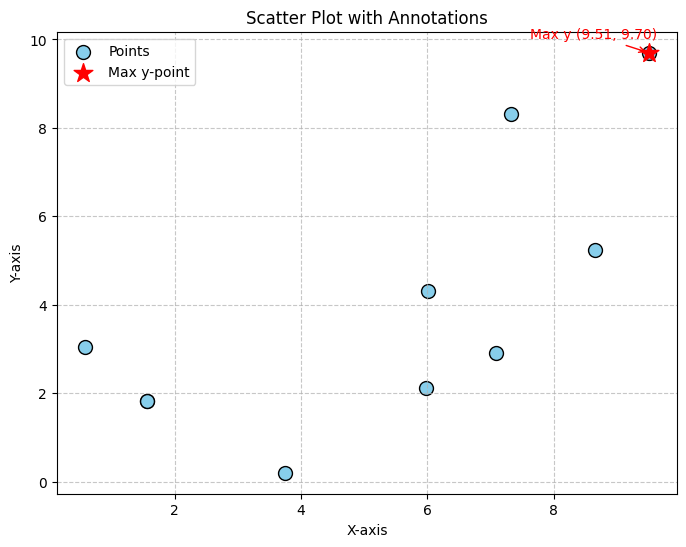

In [80]:
#Question 4

# Generate random points
np.random.seed(42)
x = np.random.rand(10) * 10  # Random x values
y = np.random.rand(10) * 10  # Random y values

# Find the point with the maximum y-coordinate
max_y_index = np.argmax(y)
max_x, max_y = x[max_y_index], y[max_y_index]

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=100, c='skyblue', edgecolors='black', label='Points')

# Annotate the point with the maximum y-coordinate
plt.scatter(max_x, max_y, s=200, c='red', marker='*', label='Max y-point')
plt.annotate(f'Max y ({max_x:.2f}, {max_y:.2f})', 
             (max_x, max_y), 
             textcoords="offset points", 
             xytext=(-40, 10), 
             ha='center', 
             color='red', 
             fontsize=10, 
             arrowprops=dict(arrowstyle="->", color='red'))

# Add labels, title, and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Annotations')
plt.legend()

# Display the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


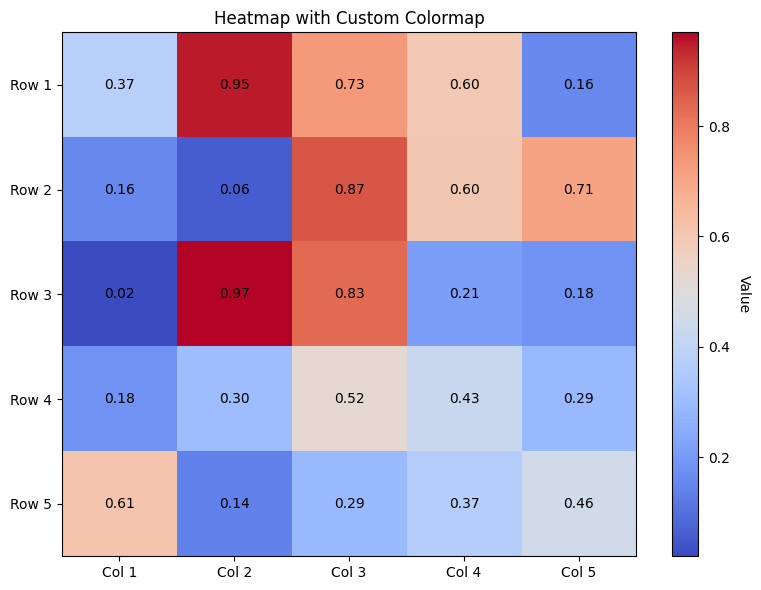

In [81]:
#Question 5 
import numpy as np
import matplotlib.pyplot as plt

# Generate a 5x5 matrix of random numbers between 0 and 1
np.random.seed(42)
data = np.random.rand(5, 5)

# Create a custom colormap (blue to red)
custom_cmap = plt.cm.get_cmap('coolwarm')

# Create the heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(data, cmap=custom_cmap, aspect='auto')

# Add color bar
cbar = plt.colorbar(heatmap)
cbar.set_label('Value', rotation=270, labelpad=15)

# Display exact cell values rounded to 2 decimals
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        plt.text(j, i, f"{data[i, j]:.2f}", ha='center', va='center', color='black')

# Add title, labels, and adjust layout
plt.title('Heatmap with Custom Colormap')
plt.xticks(range(5), labels=[f'Col {i+1}' for i in range(5)])
plt.yticks(range(5), labels=[f'Row {i+1}' for i in range(5)])
plt.tight_layout()
plt.show()


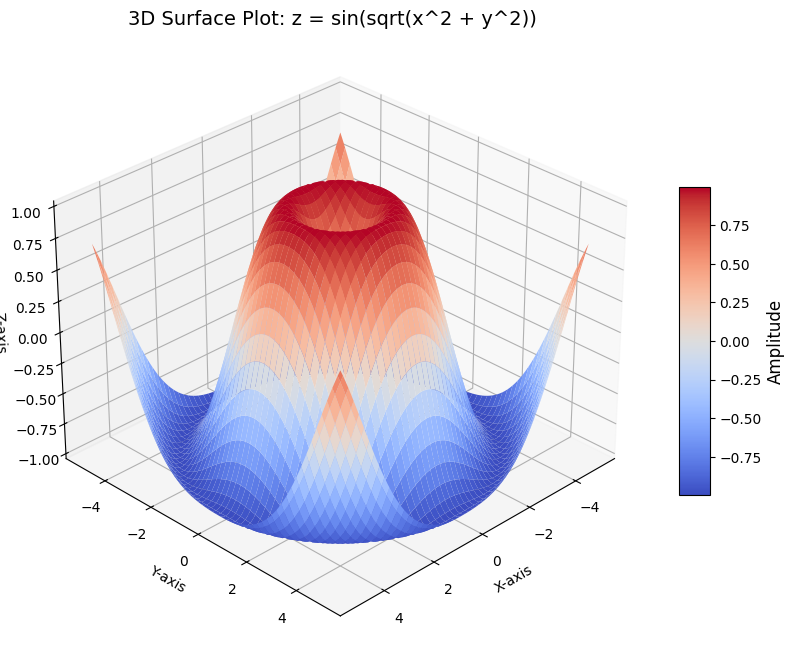

In [82]:
#Question 6


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Calculate z values
z = np.sin(np.sqrt(x**2 + y**2))

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface with a custom colormap
surface = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='none')

# Add color bar with a label
cbar = fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Amplitude', fontsize=12)

# Add labels and title
ax.set_xlabel('X-axis', fontsize=10)
ax.set_ylabel('Y-axis', fontsize=10)
ax.set_zlabel('Z-axis', fontsize=10)
ax.set_title('3D Surface Plot: z = sin(sqrt(x^2 + y^2))', fontsize=14)

# Set a custom viewing angle
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()


Set Theory